# SUBSAMPLE ANALYSIS

### INPUT, LOAD SEQUENCES

In [178]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import scipy.stats

from turtles.turtles_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [179]:
base_path = '/mnt/c/Users/jonst/Northwestern University/Tyo Lab - Shared group resources' \
            '/Publications Presentations & Proposals from Group/Manuscripts' \
            '/2022 - Callisto Strutz - tdt data storage'

#: Overall directory for TdT project data and analysis
tdt_dir = f'{base_path}/02 Analyzed data/'

#: Subdirectory for NGS run
data_dir = f'{base_path}/01 Raw data/20211109_barcoded_rec_1/data/rawDataSingles/'

#: Directory to save generated figures in
figure_dir = f'{base_path}/02 Analyzed data/preliminary_figures/Hello_World_1_subsampled/'

In [180]:
sample_max_n_reads = [300000, 100000, 10000, 1000, 100]
sample_n_random_states = [1, 5, 15, 30, 50]

# LOAD CALCULATED METRICS

In [181]:
full_df = pd.read_csv(figure_dir + '/full_subsampled_metrics.csv', index_col=0)

In [182]:
full_df

,Filename,Max Reads,Replicate,Barcodes,Condition,Position,A%,C%,G%,T%,Length,A_aitch,C_aitch,G_aitch,T_aitch
0,Control,300000,0,AATTTTGCGG,1.0,NaN,0.135076,0.237882,0.558091,0.068951,2.380663e+00,-0.328049,0.237891,1.090640,-1.000483
1,Control,300000,0,TGACTTTTAA,1.0,NaN,0.108198,0.259366,0.535040,0.097395,2.245217e+00,-0.591864,0.282411,1.006511,-0.697057
2,Control,300000,0,TAACAGTATG,1.0,NaN,0.110600,0.273327,0.520516,0.095557,2.466897e+00,-0.576861,0.327885,0.972037,-0.723061
3,Control,300000,0,AGTTTTTCAA,2.0,NaN,0.084250,0.271443,0.570239,0.074067,2.378713e+00,-0.738354,0.431611,1.173913,-0.867170
4,Control,300000,0,GGTTACACTT,2.0,NaN,0.084703,0.273646,0.573650,0.068002,2.475653e+00,-0.716483,0.456200,1.196386,-0.936102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,Message,100,49,['CAATAACCGA'],NaN,20.0,0.250000,0.250000,0.250000,0.250000,4.000000e-08,0.000000,0.000000,0.000000,0.000000
20,Message,100,49,['TTCAATTCGA'],NaN,21.0,0.200000,0.100000,0.600000,0.100000,1.666667e+00,0.071921,-0.621227,1.170533,-0.621227
21,Message,100,49,['TATAGCCACC'],NaN,22.0,0.125000,0.250000,0.500000,0.125000,2.666667e+00,-0.519860,0.173287,0.866434,-0.519860
22,Message,100,49,['CCTTCGACTC'],NaN,23.0,0.133333,0.333333,0.400000,0.133333,3.750000e+00,-0.503726,0.412565,0.594887,-0.503726


In [183]:
controls_bc_df = full_df.loc[full_df.Filename == 'Control'].drop(columns=['Position'])
message_bc_df = full_df.loc[full_df.Filename == 'Message'].drop(columns=['Condition'])

In [184]:
controls_bc_df

,Filename,Max Reads,Replicate,Barcodes,Condition,A%,C%,G%,T%,Length,A_aitch,C_aitch,G_aitch,T_aitch
0,Control,300000,0,AATTTTGCGG,1.0,0.135076,0.237882,0.558091,0.068951,2.380663e+00,-0.328049,0.237891,1.090640,-1.000483
1,Control,300000,0,TGACTTTTAA,1.0,0.108198,0.259366,0.535040,0.097395,2.245217e+00,-0.591864,0.282411,1.006511,-0.697057
2,Control,300000,0,TAACAGTATG,1.0,0.110600,0.273327,0.520516,0.095557,2.466897e+00,-0.576861,0.327885,0.972037,-0.723061
3,Control,300000,0,AGTTTTTCAA,2.0,0.084250,0.271443,0.570239,0.074067,2.378713e+00,-0.738354,0.431611,1.173913,-0.867170
4,Control,300000,0,GGTTACACTT,2.0,0.084703,0.273646,0.573650,0.068002,2.475653e+00,-0.716483,0.456200,1.196386,-0.936102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,Control,100,49,CAATAACCGA,7.0,0.250000,0.250000,0.250000,0.250000,4.000000e+00,0.000000,0.000000,0.000000,0.000000
20,Control,100,49,TTCAATTCGA,7.0,0.250000,0.250000,0.250000,0.250000,4.000000e-09,0.000000,0.000000,0.000000,0.000000
21,Control,100,49,GGTATAAAAA,8.0,0.250000,0.250000,0.250000,0.250000,4.000000e-09,0.000000,0.000000,0.000000,0.000000
22,Control,100,49,CGTATTCTCT,8.0,0.250000,0.250000,0.250000,0.250000,4.000000e-09,0.000000,0.000000,0.000000,0.000000


In [185]:
message_bc_df

,Filename,Max Reads,Replicate,Barcodes,Position,A%,C%,G%,T%,Length,A_aitch,C_aitch,G_aitch,T_aitch
0,Message,300000,0,['AATTTTGCGG'],1.0,0.090909,0.306693,0.522478,0.079920,2.698113e+00,-0.708969,0.507019,1.039753,-0.837802
1,Message,300000,0,['TGACTTTTAA'],2.0,0.079590,0.281665,0.585291,0.053455,2.550004e+00,-0.715248,0.548580,1.279972,-1.113304
2,Message,300000,0,['TAACAGTATG'],3.0,0.110228,0.269088,0.537687,0.082997,2.358335e+00,-0.548371,0.344121,1.036357,-0.832108
3,Message,300000,0,"['TTTTTGTGAA', 'GTTATACTGT', 'CAACTCGGTC']",4.0,0.175842,0.225732,0.423572,0.174854,2.638594e+00,-0.280817,-0.031053,0.598323,-0.286453
4,Message,300000,0,['CAATTGTCAT'],5.0,0.081229,0.275712,0.582975,0.060083,2.332912e+00,-0.722850,0.499230,1.248015,-1.024395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,Message,100,49,['CAATAACCGA'],20.0,0.250000,0.250000,0.250000,0.250000,4.000000e-08,0.000000,0.000000,0.000000,0.000000
20,Message,100,49,['TTCAATTCGA'],21.0,0.200000,0.100000,0.600000,0.100000,1.666667e+00,0.071921,-0.621227,1.170533,-0.621227
21,Message,100,49,['TATAGCCACC'],22.0,0.125000,0.250000,0.500000,0.125000,2.666667e+00,-0.519860,0.173287,0.866434,-0.519860
22,Message,100,49,['CCTTCGACTC'],23.0,0.133333,0.333333,0.400000,0.133333,3.750000e+00,-0.503726,0.412565,0.594887,-0.503726


# CALCULATE MEANS AND STDS FOR EACH CONTROL

In [186]:
conditions_df_means = {}
conditions_df_stds = {}

for max_n_reads, n_random_states in zip(sample_max_n_reads, sample_n_random_states):
    conditions_df_means[max_n_reads] = []
    conditions_df_stds[max_n_reads] = []
    for rs in range(n_random_states):
        numeric_only = controls_bc_df.loc[(controls_bc_df['Max Reads'] == max_n_reads) & (controls_bc_df['Replicate'] == rs),
                                          ['Condition', 'Length', 'A_aitch', 'C_aitch', 'G_aitch', 'T_aitch']]
        conditions_df_mean = numeric_only.astype('float').groupby(['Condition']).mean()
        conditions_df_std = numeric_only.astype('float').groupby(['Condition']).std()
        
        conditions_df_means[max_n_reads].append(conditions_df_mean)
        conditions_df_stds[max_n_reads].append(conditions_df_std)

In [187]:
conditions_df_means[1000][2]

,Length,A_aitch,C_aitch,G_aitch,T_aitch
Condition,,,,,
1.0,2.499378,-0.264452,0.093968,0.951113,-0.780629
2.0,2.469010,-0.519300,0.500490,1.026888,-1.008079
3.0,2.316805,-1.314490,1.072459,1.787570,-1.545539
4.0,2.599147,-0.371773,0.132740,0.820341,-0.581309
5.0,2.963428,-0.293919,-0.141072,0.479278,-0.044287
6.0,2.388889,-0.149313,-0.149313,0.447940,-0.149313
7.0,1.200000,-0.225671,-0.225671,0.677013,-0.225671
8.0,1.616667,-0.374984,-0.143935,0.893903,-0.374984


In [188]:
conditions_df_stds[1000][2]

,Length,A_aitch,C_aitch,G_aitch,T_aitch
Condition,,,,,
1.0,0.261456,0.125529,0.059154,0.145099,0.318733
2.0,0.105790,0.156573,0.148022,0.107106,0.172330
3.0,0.168580,0.430618,0.422243,0.200005,0.791626
4.0,0.149420,0.071100,0.100180,0.183442,0.185324
5.0,0.179271,0.029392,0.024905,0.064377,0.051695
6.0,1.397750,0.138887,0.138887,0.416661,0.138887
7.0,1.058301,0.205603,0.205603,0.616810,0.205603
8.0,0.125831,0.089828,0.343003,0.284721,0.089828


## MESSAGE DECODING

In [189]:
pdfs = pd.DataFrame(columns=['Position', 'Condition', 'PDF_len', 'PDF_A', 'PDF_C', 'PDF_G', 'PDF_T'])

for max_n_reads, n_random_states in zip(sample_max_n_reads, sample_n_random_states):
    for rs in range(n_random_states):
        sub_mean = conditions_df_means[max_n_reads][rs]
        sub_std = conditions_df_stds[max_n_reads][rs]

        msg_sub_df = message_bc_df.loc[(message_bc_df['Max Reads'] == max_n_reads) & (message_bc_df['Replicate'] == rs)]

        for condition, avg_len, std_len, avg_aitch, std_aitch in zip(
            sub_mean.index,
            sub_mean.Length,
            sub_std.Length,
            sub_mean.loc[:, ['A_aitch', 'C_aitch', 'G_aitch', 'T_aitch']].values,
            sub_std.loc[:, ['A_aitch', 'C_aitch', 'G_aitch', 'T_aitch']].values):

            length_dist = scipy.stats.norm(avg_len, 0.2)

            a_dist = scipy.stats.norm(avg_aitch[0], std_aitch[0])
            c_dist = scipy.stats.norm(avg_aitch[1], std_aitch[1])
            g_dist = scipy.stats.norm(avg_aitch[2], std_aitch[2])
            t_dist = scipy.stats.norm(avg_aitch[3], std_aitch[3])

            if condition in [7, 8]:
                continue  # didn't use these conditions for encoding

            for position, avg_len, avg_aitch in zip(
                msg_sub_df.Position,
                msg_sub_df.Length,
                msg_sub_df.loc[:, ['A_aitch', 'C_aitch', 'G_aitch', 'T_aitch']].values,
            ):
                len_pdf = length_dist.pdf(avg_len)
                a_pdf = a_dist.pdf(avg_aitch[0])
                c_pdf = c_dist.pdf(avg_aitch[1])
                g_pdf = g_dist.pdf(avg_aitch[2])
                t_pdf = t_dist.pdf(avg_aitch[3])

                this_cond_pdfs = {
                    'Max Reads': max_n_reads,
                    'Replicate': rs,
                    'Condition': condition,
                    'Position': position,
                    'PDF_len': len_pdf,
                    'PDF_A': a_pdf,
                    'PDF_C': c_pdf,
                    'PDF_G': g_pdf,
                    'PDF_T': t_pdf
                }

                pdfs = pdfs.append(this_cond_pdfs, ignore_index=True)

/home/jonstrutz/anaconda3/envs/turtles/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/jonstrutz/anaconda3/envs/turtles/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/jonstrutz/anaconda3/envs/turtles/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/jonstrutz/anaconda3/envs/turtles/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/jonstrutz/anaconda3/envs/turtles/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: divide b

/home/jonstrutz/anaconda3/envs/turtles/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/jonstrutz/anaconda3/envs/turtles/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/jonstrutz/anaconda3/envs/turtles/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/jonstrutz/anaconda3/envs/turtles/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/jonstrutz/anaconda3/envs/turtles/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid 

/home/jonstrutz/anaconda3/envs/turtles/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/jonstrutz/anaconda3/envs/turtles/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/jonstrutz/anaconda3/envs/turtles/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/jonstrutz/anaconda3/envs/turtles/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/jonstrutz/anaconda3/envs/turtles/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid 

In [190]:
pdfs

,Position,Condition,PDF_len,PDF_A,PDF_C,PDF_G,PDF_T,Max Reads,Replicate
0,1.0,1.0,4.952302e-01,0.985795,3.570561e-05,6.298842e+00,2.332327,300000.0,0.0
1,2.0,1.0,1.295938e+00,0.927493,2.333903e-07,9.226090e-04,0.451036,300000.0,0.0
2,3.0,1.0,1.993837e+00,2.546595,3.495569e+00,6.385576e+00,2.345553,300000.0,0.0
3,4.0,1.0,7.786104e-01,0.911258,2.446763e-10,1.954194e-10,0.019765,300000.0,0.0
4,5.0,1.0,1.970360e+00,0.859423,8.335262e-05,7.300357e-03,1.027681,300000.0,0.0
...,...,...,...,...,...,...,...,...,...
14539,20.0,6.0,2.760485e-87,NaN,NaN,NaN,NaN,100.0,49.0
14540,21.0,6.0,5.542782e-30,NaN,NaN,NaN,NaN,100.0,49.0
14541,22.0,6.0,4.455450e-10,NaN,NaN,NaN,NaN,100.0,49.0
14542,23.0,6.0,9.132454e-01,NaN,NaN,NaN,NaN,100.0,49.0


In [191]:
pdfs['PDF_Total'] = pdfs['PDF_len'] * (pdfs['PDF_A'] + pdfs['PDF_C'] + pdfs['PDF_G'] + pdfs['PDF_T'])

In [192]:
pdfs = pdfs.sort_values(['Max Reads', 'Replicate', 'Position', 'Condition'])
pdfs = pdfs[pdfs.Position <= 22]

In [193]:
pdfs

,Position,Condition,PDF_len,PDF_A,PDF_C,PDF_G,PDF_T,Max Reads,Replicate,PDF_Total
7344,1.0,1.0,1.177539e-36,7.742161e-01,7.874421e-01,2.016077e-01,1.674020e-01,100.0,0.0,2.273436e-36
7368,1.0,2.0,2.561677e-28,2.203869e-08,3.162847e-01,1.927704e-06,2.203869e-08,100.0,0.0,8.102241e-29
7392,1.0,3.0,2.581728e-42,2.787121e-01,4.364739e-01,3.770126e-02,2.787121e-01,100.0,0.0,2.663308e-42
7416,1.0,4.0,2.818264e-42,3.440139e-01,7.550773e-01,1.009116e-02,8.842654e-01,100.0,0.0,5.618063e-42
7440,1.0,5.0,5.696535e-53,1.122937e+00,4.655102e-01,3.954981e-01,5.980262e-01,100.0,0.0,1.470829e-52
...,...,...,...,...,...,...,...,...,...,...
45,22.0,2.0,9.293062e-01,1.680037e-17,5.487720e-18,1.498828e-266,8.360718e-40,300000.0,0.0,2.071246e-17
69,22.0,3.0,1.993915e+00,4.036102e-06,2.681607e-17,9.490142e-87,7.074214e-06,300000.0,0.0,2.215303e-05
93,22.0,4.0,1.443648e+00,4.023491e+00,1.314996e+01,5.059569e-07,2.404479e-06,300000.0,0.0,2.479241e+01
117,22.0,5.0,1.423352e+00,1.394750e-01,1.766373e-27,5.249742e-07,1.194450e-24,300000.0,0.0,1.985228e-01


In [194]:
pdfs.to_csv(figure_dir + '/final_scores.csv')

# COMPARE RESULTS TO ENCODED VALUES

In [195]:
correct_vals = [2, 2, 1, 5, 2, 6, 2, 6, 3, 3, 5, 3, 4, 5, 3, 3, 3, 6, 2, 6, 1, 4]

In [196]:
idx = pdfs.groupby(['Max Reads', 'Replicate', 'Position'])['PDF_Total'].transform(max) == pdfs['PDF_Total']

In [197]:
final_results = pdfs[idx].drop(['PDF_len', 'PDF_A', 'PDF_C', 'PDF_G', 'PDF_T', 'PDF_Total'], axis=1)
final_results['Decoded'] = final_results['Condition'].astype(int)
final_results['Encoded'] = correct_vals * sum(sample_n_random_states)
final_results = final_results.drop(['Condition'], axis=1)
final_results = final_results.loc[:, ['Max Reads', 'Replicate', 'Position', 'Encoded', 'Decoded']]
final_results['Correct'] = final_results['Encoded'] == final_results['Decoded']
final_results['Position'] = final_results['Position'].astype(int)
final_results['Replicate'] = final_results['Replicate'].astype(int)
final_results['Max Reads'] = final_results['Max Reads'].astype(int)
final_results

,Max Reads,Replicate,Position,Encoded,Decoded,Correct
7368,100,0,1,2,2,True
7417,100,0,2,2,4,False
7370,100,0,3,1,2,False
7371,100,0,4,5,2,False
7444,100,0,5,2,5,False
...,...,...,...,...,...,...
137,300000,0,18,6,6,True
42,300000,0,19,2,2,True
139,300000,0,20,6,6,True
92,300000,0,21,1,4,False


In [198]:
final_results.to_csv(figure_dir + '/final_top_scores.csv')

# PLOT RESULTS

In [199]:
def get_n_correct_char(sub_df):
    n_correct_char = 0
    for first_pos in range(1, 22, 2):
        second_pos = first_pos + 1.0
        first_correct = sub_df.loc[sub_df.Position == first_pos, 'Correct'].values[0]
        second_correct = sub_df.loc[sub_df.Position == second_pos, 'Correct'].values[0]
        if first_correct and second_correct:
            n_correct_char += 1
    return n_correct_char

In [228]:
df = pd.DataFrame()

n_max_reads_col = []
n_replicate_col = []
n_correct_pos_col = []
n_correct_char_col = []

for max_n_reads, n_random_states in zip(sample_max_n_reads, sample_n_random_states):
    for rs in range(n_random_states):
        sub_df = final_results.loc[(final_results['Max Reads'] == max_n_reads) & (final_results['Replicate'] == rs)]
        n_correct_pos = sum(sub_df['Correct'])
        n_correct_char = get_n_correct_char(sub_df)
        
        n_max_reads_col.append(max_n_reads)
        n_replicate_col.append(rs)
        n_correct_pos_col.append(n_correct_pos)
        n_correct_char_col.append(n_correct_char)
        
df['# Reads per Pool'] = n_max_reads_col
df['# Reads per Pool (jitter)'] = df['# Reads per Pool'].apply(lambda x: x * (0.75 + np.random.random() / 2))
df['Replicate'] = n_replicate_col
df['# Correct Conditions'] = n_correct_pos_col
df['# Correct Characters'] = n_correct_char_col
df = df.drop(0)

In [229]:
df

,# Reads per Pool,# Reads per Pool (jitter),Replicate,# Correct Conditions,# Correct Characters
1,100000,102288.048603,0,20,9
2,100000,85239.209323,1,20,9
3,100000,89787.491566,2,21,10
4,100000,91864.025514,3,21,10
5,100000,116762.848019,4,20,9
...,...,...,...,...,...
96,100,95.214199,45,5,0
97,100,97.883424,46,3,0
98,100,85.334208,47,9,2
99,100,85.899162,48,2,1


In [230]:
sns.set(style='white', font='Times New Roman', font_scale=1.5)

In [257]:
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
matplotlib.rc('axes', edgecolor='0.6')

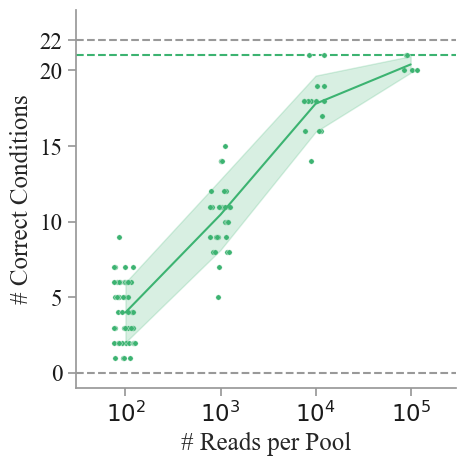

In [273]:
fig, ax = plt.subplots(figsize=(5,5))

plt.axhline(0, c='0.6', ls='--', zorder=-1)
plt.axhline(21, c='mediumseagreen', ls='--', zorder=-1)
plt.axhline(22, c='0.6', ls='--', zorder=-1)
ax.tick_params(color='0.6', labelcolor='k')

sns.scatterplot(x='# Reads per Pool (jitter)', y='# Correct Conditions', data=df,
                color='mediumseagreen', zorder=1, s=15)
sns.lineplot(x='# Reads per Pool', y='# Correct Conditions', data=df, color='mediumseagreen',
             zorder=2, ci='sd')

plt.xlim(30, 3*10**5)
plt.ylim(-1, 24)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_yticks(list(range(0, 25, 5)) + [22])
ax.set_xscale('log')

ax.set_xticks([100, 1000, 10000, 100000])
ax.set_xticklabels(['$10^2$', '$10^3$', '$10^4$', '$10^5$'])

plt.xlabel('# Reads per Pool')

plt.minorticks_off()
plt.tight_layout()
plt.show()

fig.savefig(figure_dir + '/Subsample_Results_Conditions.png')
fig.savefig(figure_dir + '/Subsample_Results_Conditions.svg')

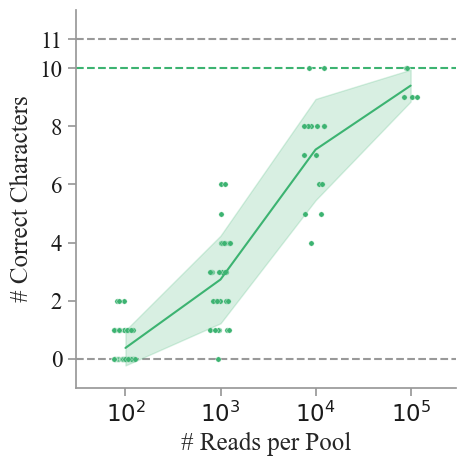

In [272]:
fig, ax = plt.subplots(figsize=(5,5))

plt.axhline(0, c='0.6', ls='--', zorder=-1)
plt.axhline(10, c='mediumseagreen', ls='--', zorder=-1)
plt.axhline(11, c='0.6', ls='--', zorder=-1)
ax.tick_params(color='0.6', labelcolor='k')

sns.scatterplot(x='# Reads per Pool (jitter)', y='# Correct Characters', data=df,
                color='mediumseagreen', ax=ax, zorder=1, s=15)
sns.lineplot(x='# Reads per Pool', y='# Correct Characters', data=df, color='mediumseagreen',
             ax=ax, zorder=2, ci='sd')

plt.xlim(30, 3*10**5)
plt.ylim(-1, 12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_yticks(list(range(0, 12, 2)) + [11])
ax.set_xscale('log')

ax.set_xticks([100, 1000, 10000, 100000])
ax.set_xticklabels(['$10^2$', '$10^3$', '$10^4$', '$10^5$'])

plt.xlabel('# Reads per Pool')

plt.minorticks_off()
plt.tight_layout()
plt.show()

fig.savefig(figure_dir + '/Subsample_Results_Characters.png')
fig.savefig(figure_dir + '/Subsample_Results_Characters.svg')